In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
# Load dataset
path = "D:\Download\Indian Liver Patient Dataset (ILPD).csv"
df = pd.read_csv(path)

In [3]:
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df['is_patient'] = df['is_patient'].replace({2:0})
df

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df1 = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
tot_bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
direct_bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
tot_proteins,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
albumin,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
ag_ratio,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
sgpt,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
sgot,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
alkphos,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
is_patient,583.0,0.713551,0.452490,0.0,0.0,1.00,1.0,1.0


In [8]:
print("Class Distribution (Patients vs Non-Patients):")
print(df['is_patient'].value_counts())

Class Distribution (Patients vs Non-Patients):
is_patient
1    416
0    167
Name: count, dtype: int64


In [9]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [10]:
df['alkphos'].fillna(df['alkphos'].median(), inplace=True)

# Hypothesis Testing 

### 1. Chi-square Test
The chi-square test is a statistical method used to determine if there is a significant association between two categorical variables. It compares observed frequencies in a contingency table to the frequencies expected if the variables were independent.

Null Hypothesis (H₀): The variables are independent (no association).

Alternative Hypothesis (H₁): The variables are dependent (associated).

In [11]:
# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(df['gender'], df['is_patient'])
print("Observed Frequencies:")
print(contingency_table)

chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_val:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)

# Check expected frequencies assumption
if (expected < 5).any():
    print("\nWarning: Some expected frequencies are <5. Use Fisher’s exact test instead.")

if p_val <= alpha:
    print("\nReject H₀: Gender and liver disease status are associated.")
else:
    print("\nFail to reject H₀: No significant association between gender and liver disease status.")

Observed Frequencies:
is_patient    0    1
gender              
Female       50   92
Male        117  324

Chi-Square Statistic: 3.5466
P-value: 0.0597
Degrees of Freedom: 1

Expected Frequencies:
[[ 40.67581475 101.32418525]
 [126.32418525 314.67581475]]

Fail to reject H₀: No significant association between gender and liver disease status.


### 2. t-Test
The t-test is used to compare the means of two groups and determine if the difference is statistically significant.\
Types of t-tests:

1. One-sample t-test	: Compare the sample mean to a known/population mean
2. Two-sample (independent) t-test :	Compare means of two independent groups
3. Paired t-test : Compare means of the same group at different times

Null Hypothesis (H₀): The means of the two groups are equal.

Alternative Hypothesis (H₁): The means of the two groups are different.



In [12]:
patients = df[df['is_patient'] == 1]['tot_bilirubin']
non_patients = df[df['is_patient'] == 0]['tot_bilirubin']

t_stat, p_val = stats.ttest_ind(patients, non_patients, equal_var=False)  # Welch’s t-test

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("→ Statistically significant difference in Total Bilirubin between the two groups.")
else:
    print("→ No significant difference in Total Bilirubin between the two groups.")

T-statistic: 8.4217
P-value: 0.0000
→ Statistically significant difference in Total Bilirubin between the two groups.


### 3. F-statistic Test (ANOVA)
The F-statistic is commonly used in ANOVA (Analysis of Variance) to compare means of multiple groups and determine whether at least one group mean is significantly different from the others.

Purpose:
Null Hypothesis (H₀): All group means are equal.

Alternative Hypothesis (H₁): At least one group mean is different.

In [13]:
patients = df[df['is_patient'] == 1]['tot_bilirubin']
non_patients = df[df['is_patient'] == 0]['tot_bilirubin']

f_stat, p_val = stats.f_oneway(patients, non_patients)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("→ Statistically significant difference in Total Bilirubin between liver and non-liver patients.")
else:
    print("→ No significant difference in Total Bilirubin between groups.")

F-statistic: 29.6093
P-value: 0.0000
→ Statistically significant difference in Total Bilirubin between liver and non-liver patients.


### 4. Z-test
The Z-test is used to determine whether two population means are significantly different when:

The population variance is known, or

The sample size is large (n > 30)

🧪 Common Scenarios:
One-sample Z-test: Comparing a sample mean to a known population mean.

Two-sample Z-test: Comparing means from two independent samples.

In [14]:
from scipy.stats import norm

patients = df[df['is_patient'] == 1]['tot_bilirubin']
non_patients = df[df['is_patient'] == 0]['tot_bilirubin']

# Calculate statistics
mean1, mean2 = patients.mean(), non_patients.mean()
std1, std2 = patients.std(), non_patients.std()
n1, n2 = len(patients), len(non_patients)

# Compute Z-score
z = (mean1 - mean2) / np.sqrt((std1**2)/n1 + (std2**2)/n2)

# Two-tailed p-value
p_val = 2 * (1 - norm.cdf(abs(z)))

print(f"Z-score: {z:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("→ Statistically significant difference in Total Bilirubin between liver and non-liver patients.")
else:
    print("→ No significant difference in Total Bilirubin between groups.")

Z-score: 8.4217
P-value: 0.0000
→ Statistically significant difference in Total Bilirubin between liver and non-liver patients.


In [15]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

### 5. Correlation analysis

Correlation measures the strength and direction of a linear relationship between two continuous variables.\
Common Correlation Coefficients:
Pearson’s 
𝑟
: Measures linear relationships.\
Spearman’s ρ: Measures monotonic relationships (based on rank).

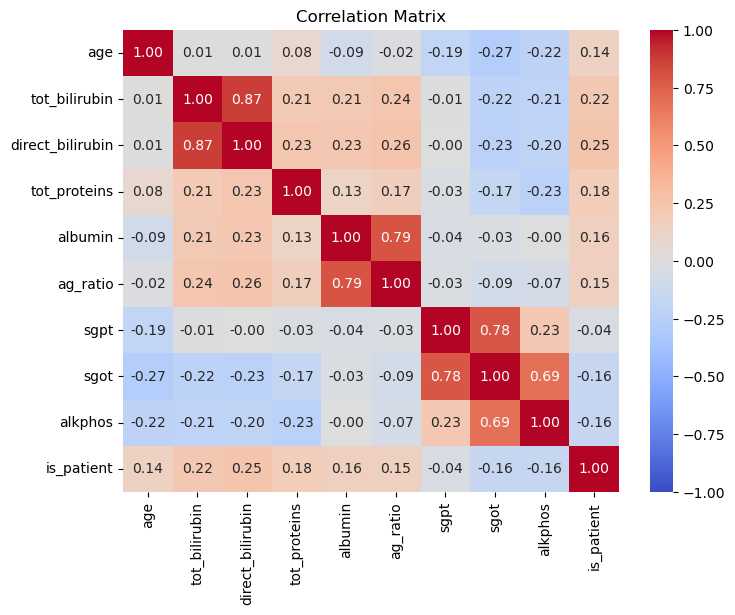

In [16]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 6. Visualization

Text(0.5, 1.0, 'Total Bilirubin Distribution')

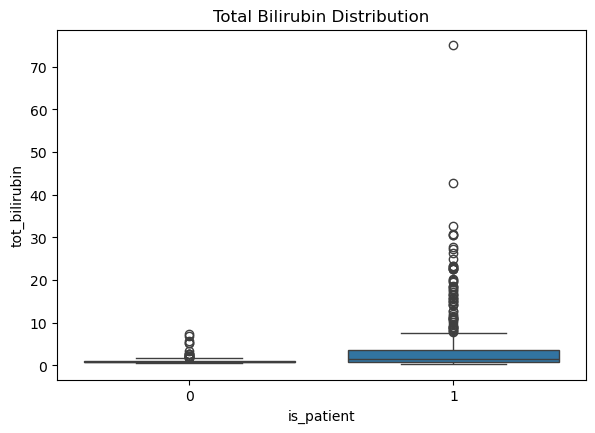

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='is_patient', y='tot_bilirubin', data=df)
plt.title('Total Bilirubin Distribution')

Text(0.5, 1.0, 'Gender Distribution by Disease Status')

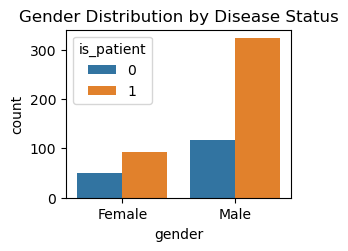

In [18]:
# Bar Chart: Gender Distribution
plt.subplot(2,2,2)
sns.countplot(x='gender', hue='is_patient', data=df)
plt.title('Gender Distribution by Disease Status')

Text(0.5, 1.0, 'Albumin vs Total Proteins')

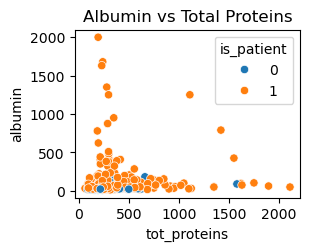

In [19]:
# Scatterplot: Albumin vs Total Proteins
plt.subplot(2,2,3)
sns.scatterplot(x='tot_proteins', y='albumin', hue='is_patient', data=df)
plt.title('Albumin vs Total Proteins')

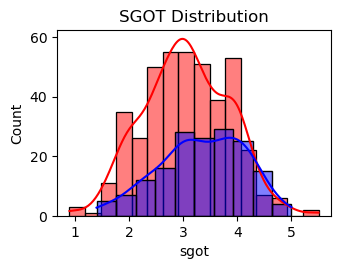

In [20]:
# Distribution Plot: SGOT
plt.subplot(2,2,4)
sns.histplot(df[df['is_patient']==1]['sgot'], color='red', label='Patients', kde=True)
sns.histplot(df[df['is_patient']==0]['sgot'], color='blue', label='Non-Patients', kde=True)
plt.title('SGOT Distribution')

plt.tight_layout()
plt.show()

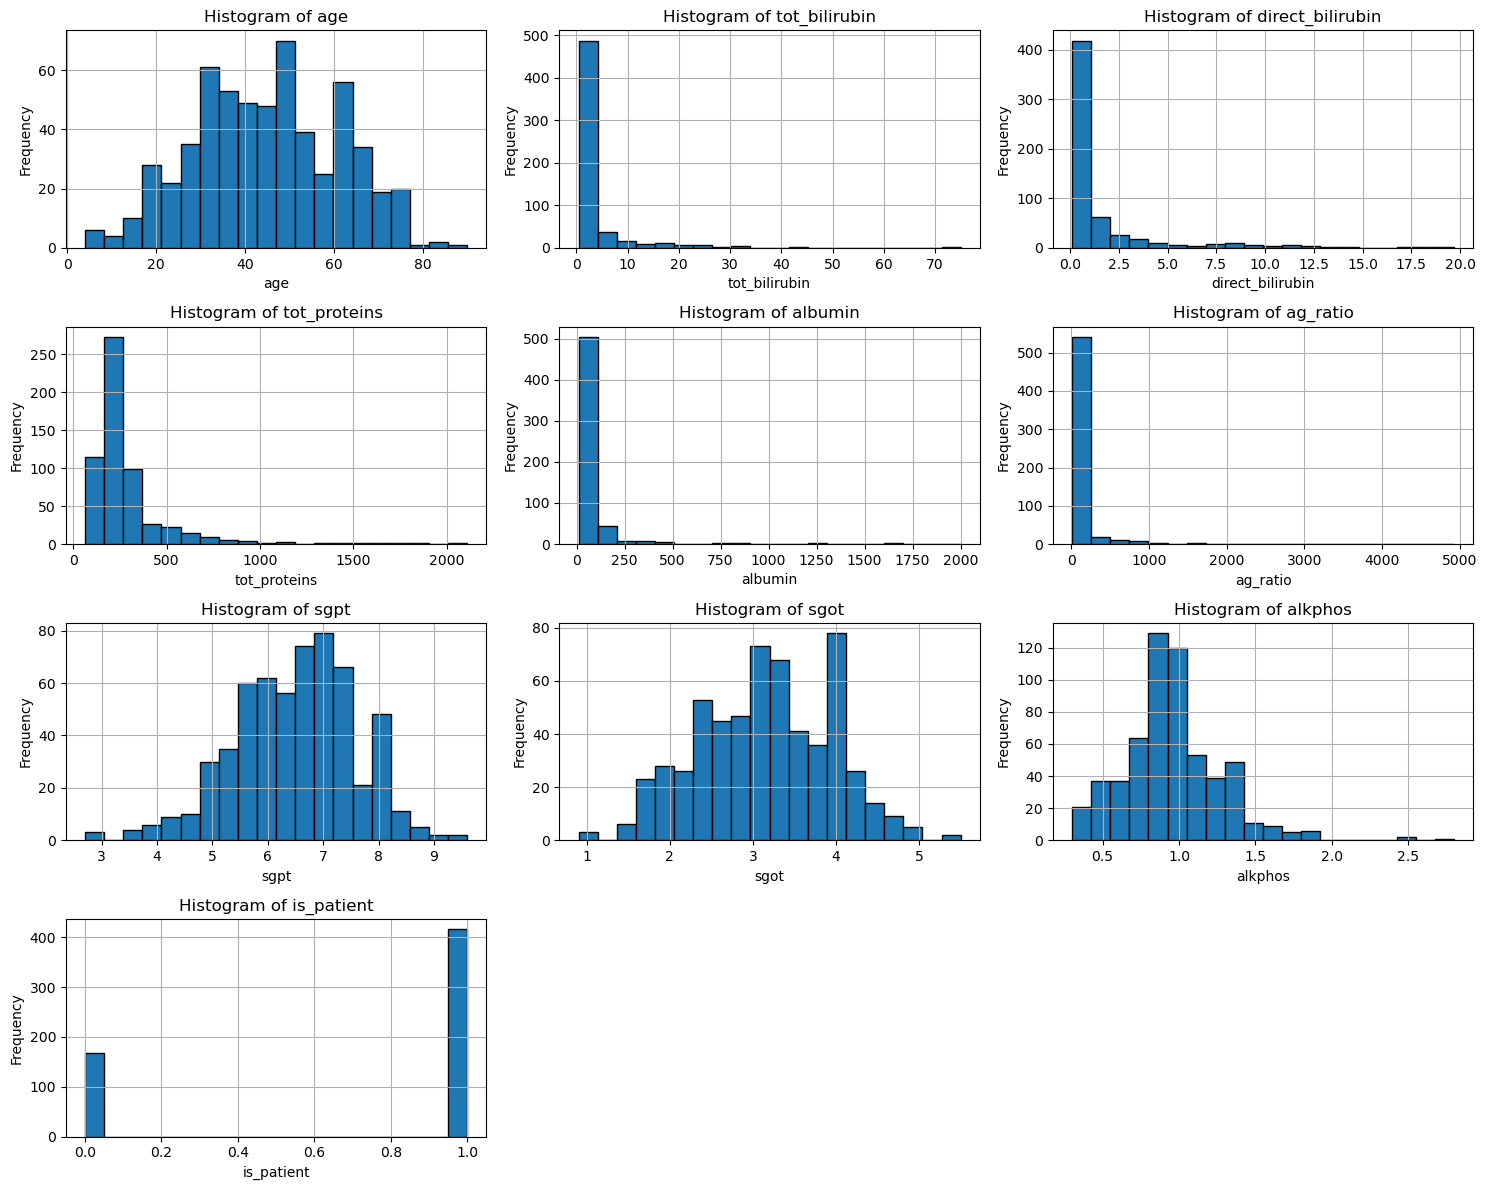

In [21]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i) 
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

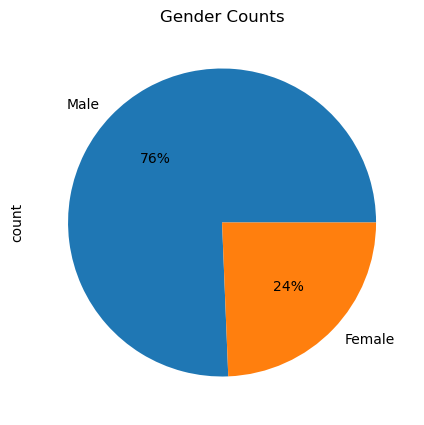

In [22]:
# Gender Distribution
plt.figure(figsize=(7,5))
df["gender"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Gender Counts")
plt.show()

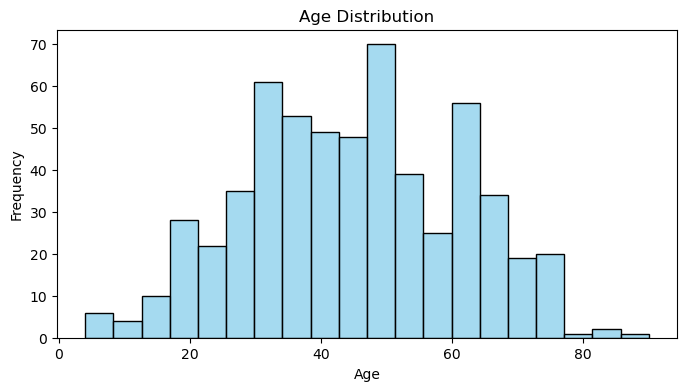

In [23]:
# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 7. Confidence Interval
A Confidence Interval gives a range of values within which the true population parameter (like mean) is expected to lie with a certain level of confidence (e.g., 95%).

In [24]:
# we take one attribute e.g. bilirubin for 95% confidence interval range
bilirubin = df[df['is_patient'] == 1]['tot_bilirubin']

# Sample statistics
n = len(bilirubin)
mean = np.mean(bilirubin)
std_err = stats.sem(bilirubin)  # standard error
confidence = 0.95

# t critical value
t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)

# Confidence interval
margin_of_error = t_critical * std_err
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Sample size (n): {n}")
print(f"Mean Total Bilirubin: {mean:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


Sample size (n): 416
Mean Total Bilirubin: 4.1644
95% Confidence Interval: (3.4758, 4.8530)


In [25]:
print("95% Confidence Intervals for Key Variables")

for var in ['tot_bilirubin', 'albumin', 'sgot']:
    group = df[df['is_patient']==1][var]
    ci = stats.t.interval(0.95, len(group)-1, loc=np.mean(group), scale=stats.sem(group))
    print(f"{var}: {ci[0]:.2f} - {ci[1]:.2f}")

95% Confidence Intervals for Key Variables
tot_bilirubin: 3.48 - 4.85
albumin: 79.10 - 120.11
sgot: 2.98 - 3.14


### In a healthy individual's blood, the amount of alkaline phosphatase is calculated as 20 - 140 IU/L. While measurements above 140 indicate high ALP, measurements below 20 rarely indicate low ALP. In addition to all this, the normal value of ALP may vary with age.

In [26]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

In [27]:
alkphos_threshold = 140 
high_alkphos_patients = df[df['alkphos'] > alkphos_threshold]

print(f"Number of high value patients in 'alkphos': {high_alkphos_patients.shape[0]}")

Number of high value patients in 'alkphos': 0


### According to WHO, values ​​​​of 140 and above are considered dangerous. Since our values ​​​​are entered differently in our data set, we are trying to analyze by filtering here.

In [28]:
alkphos_threshold = df['alkphos'].quantile(0.95)
high_alkphos_patients = df[df['alkphos'] > alkphos_threshold]
print(f"Number of high value patients in 'alkphos': {high_alkphos_patients.shape[0]}")

Number of high value patients in 'alkphos': 24


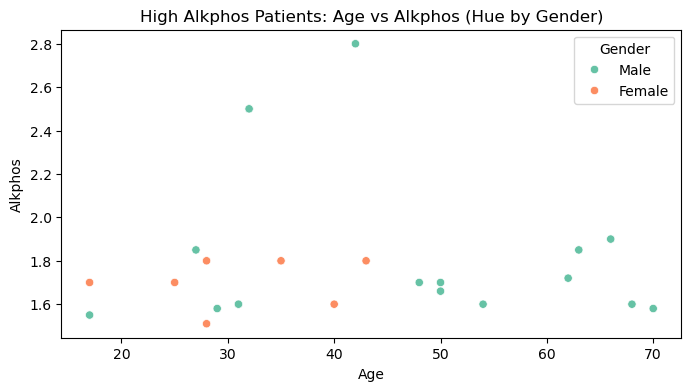

In [29]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=high_alkphos_patients, x='age', y='alkphos', hue='gender', palette='Set2')
plt.title('High Alkphos Patients: Age vs Alkphos (Hue by Gender)')
plt.xlabel('Age')
plt.ylabel('Alkphos')
plt.legend(title='Gender')
plt.show()